<a href="https://colab.research.google.com/github/Hound36114/START-OF-PROJECTS/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For scaling
from sklearn.preprocessing import MinMaxScaler

# For building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# For evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('/TSLA.csv')


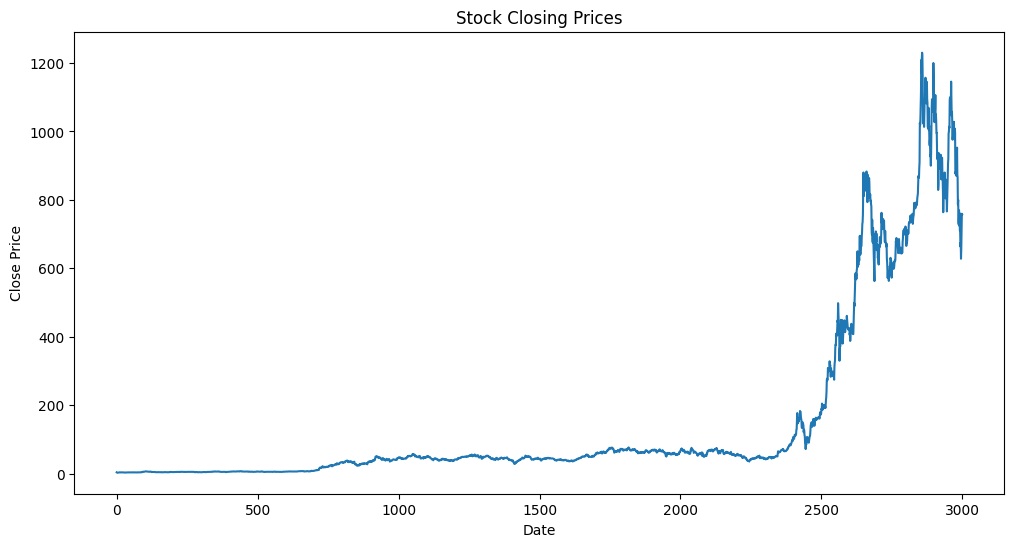

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
print(df.info())
df = df.dropna()
df.describe()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3000 non-null   object 
 1   Open       3000 non-null   float64
 2   High       3000 non-null   float64
 3   Low        3000 non-null   float64
 4   Close      3000 non-null   float64
 5   Adj Close  3000 non-null   float64
 6   Volume     3000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 164.2+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
...,...,...,...,...,...,...,...
95,2010-11-15,6.044,6.588,6.044,6.160,6.160,13114500
96,2010-11-16,6.200,6.280,5.684,5.934,5.934,6738000
97,2010-11-17,6.040,6.150,5.722,5.898,5.898,3750000
98,2010-11-18,6.134,6.148,5.784,5.978,5.978,4780500


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
data = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Splitting the data
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 30:, :]

In [ ]:
# Creating the dataset with a sliding window
X_train, y_train = [], []
for i in range(30, len(train_data)):
    X_train.append(train_data[i-30:i])
    y_train.append(train_data[i])

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=32)


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 3.1544e-04
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.1502e-06
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 9.8058e-06
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 8.1067e-06
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 6.7636e-06
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.0382e-06
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.4446e-06
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0948e-06
Epoch 9/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 6.4676e-06
Epoch 10/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.5825e-06
Epoch 11/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 7.2228e-06
Epoch 12/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.4513e-06
Epoch 13/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.8495e-06
Epoch 14/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.2212e-06
Epoch 15/30
75/

In [ ]:
X_test = []
y_test = data[training_data_len:, :]
for i in range(30, len(test_data)):

    X_test.append(test_data[i - 30:i, :])

X_test = np.array(X_test)

In [ ]:
Predictions = model.predict(X_test)

Predictions = scaler.inverse_transform(Predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, Predictions))
mae = mean_absolute_error(y_test, Predictions)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 50.91016484835189
MAE: 35.60423949362223


/tmp/ipython-input-2856798694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = Predictions


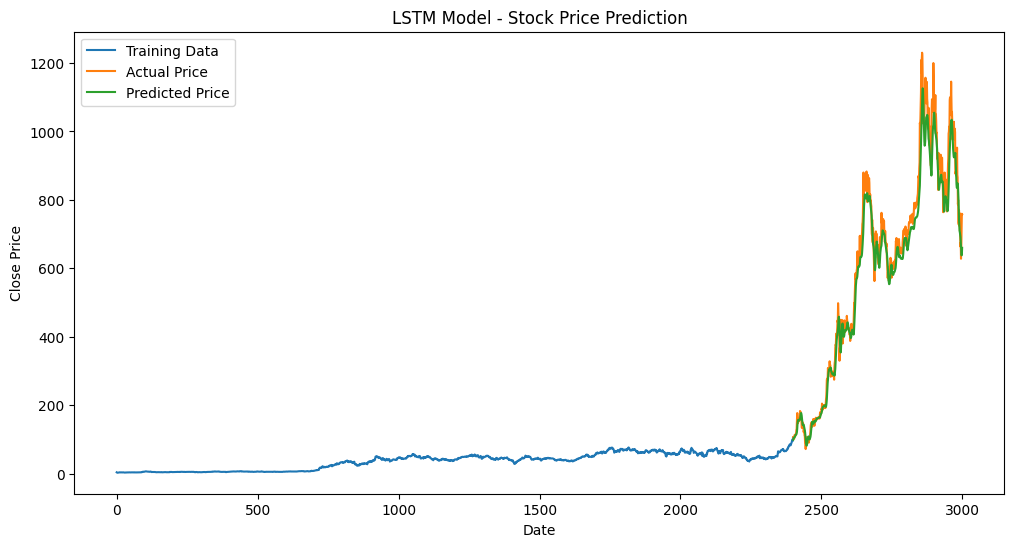

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = Predictions

plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.title('LSTM Model - Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()